# Imports, classes and methods declaration

In [1]:
from google.colab import drive
import sys
import os
import numpy as np

# Local python files imports
drive.flush_and_unmount()
drive.mount("/content/gdrive", force_remount=True)
sys.path.append(os.path.abspath(
    '/content/gdrive/MyDrive/ULPGC/TFT/projects/'
    + 'Tomography-Model'))

from tomography_model.model import model
from tomography_model import dataset
from tomography_model.common.constants import AUGMENTED_DATASET_2
from tomography_model.model.utils.plotters import (
    plot_results,
    get_falses,
    plot_images
)
from tomography_model.model.utils.data_management import (
    dataset_images_to_files,
    load_data
)

Mounted at /content/gdrive


# Dataset and train

In [2]:
dataset = dataset.Dataset(AUGMENTED_DATASET_2)
dataset_images_to_files(dataset)

INFO [10/10/21 14:56:58] => Getting images from CT_COVID
INFO [10/10/21 14:57:04] => Getting images from CT_NonCOVID
INFO [10/10/21 14:57:11] => Splitting dataset into training and test
INFO [10/10/21 14:57:11] => The dataset has been generated successfully
*************************************************
INFO [10/10/21 14:57:11] => Inserting data into the file: /content/gdrive/MyDrive/ULPGC/TFT/data/data_variable_files/dataset_2/train_images
INFO [10/10/21 14:57:15] => The data has been inserted successfully
*************************************************
INFO [10/10/21 14:57:15] => Inserting data into the file: /content/gdrive/MyDrive/ULPGC/TFT/data/data_variable_files/dataset_2/train_labels
INFO [10/10/21 14:57:15] => The data has been inserted successfully
*************************************************
INFO [10/10/21 14:57:15] => Inserting data into the file: /content/gdrive/MyDrive/ULPGC/TFT/data/data_variable_files/dataset_2/test_images
INFO [10/10/21 14:57:16] => The data 

In [3]:
load_data(dataset)

INFO [10/10/21 14:57:16] => Retrieving all the dataset from files
INFO [10/10/21 14:57:19] => All the dataset has been obtained successfully


In [4]:
model = model.Model(dataset)

*************************************************
INFO [10/10/21 14:57:19] => Training model
Epoch 1/60
27/27 [==============================] - 17s 279ms/step - loss: 0.7306 - accuracy: 0.5674 - val_loss: 0.6168 - val_accuracy: 0.6687
Epoch 2/60
27/27 [==============================] - 4s 157ms/step - loss: 0.5726 - accuracy: 0.7081 - val_loss: 0.5478 - val_accuracy: 0.7254
Epoch 3/60
27/27 [==============================] - 4s 157ms/step - loss: 0.5108 - accuracy: 0.7500 - val_loss: 0.5023 - val_accuracy: 0.7642
Epoch 4/60
27/27 [==============================] - 4s 158ms/step - loss: 0.4207 - accuracy: 0.7964 - val_loss: 0.5086 - val_accuracy: 0.7552
Epoch 5/60
27/27 [==============================] - 4s 157ms/step - loss: 0.3849 - accuracy: 0.8293 - val_loss: 0.3901 - val_accuracy: 0.8209
Epoch 6/60
27/27 [==============================] - 4s 159ms/step - loss: 0.2937 - accuracy: 0.8847 - val_loss: 0.3430 - val_accuracy: 0.8478
Epoch 7/60
27/27 [==============================] - 4s

# Train results

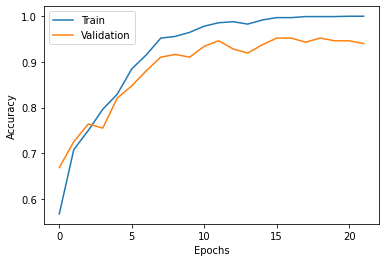

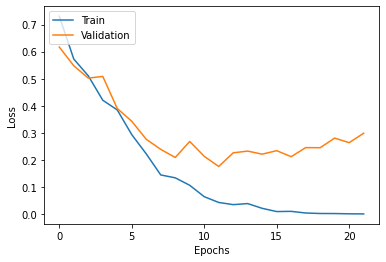

No handles with labels found to put in legend.


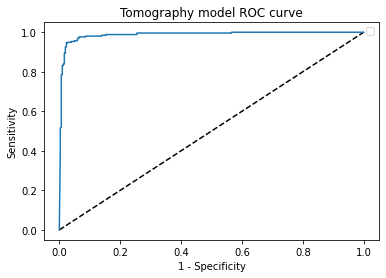

INFO [10/10/21 14:59:11] => Classification report:
              precision    recall  f1-score   support

   Not COVID       0.95      0.97      0.96       302
       COVID       0.97      0.95      0.96       256

    accuracy                           0.96       558
   macro avg       0.96      0.96      0.96       558
weighted avg       0.96      0.96      0.96       558



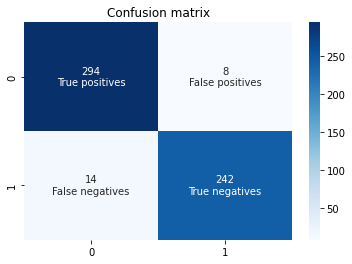

In [5]:
plot_results(dataset.test_images, dataset.test_labels, model.results)

# Visualize falses

In [6]:
false_negatives, false_positives = get_falses(
    dataset.test_images,
    dataset.test_labels, 
    np.round(model.results['Model test predictions']))

INFO [10/10/21 14:59:11] => Getting false negatives and positives...
INFO [10/10/21 14:59:11] => Falses report:
- False negatives: 14
- False positives: 8


INFO [10/10/21 14:59:11] => Plotting false negatives


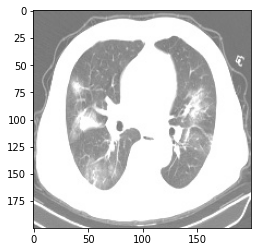

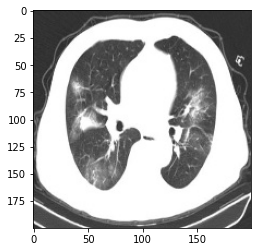

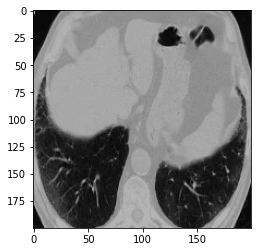

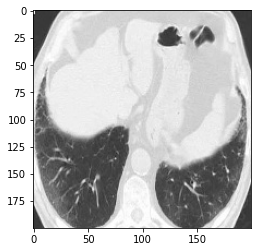

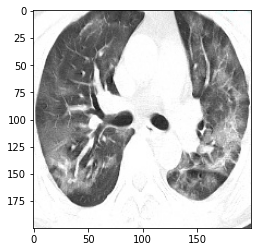

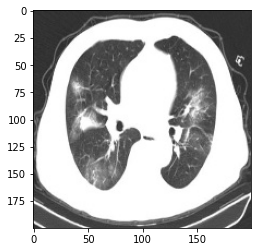

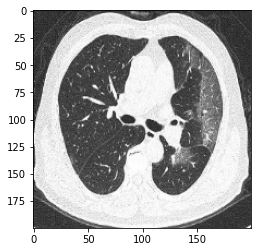

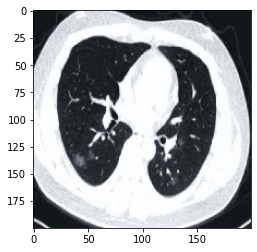

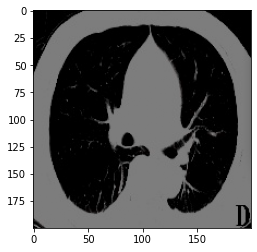

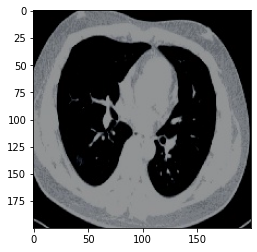

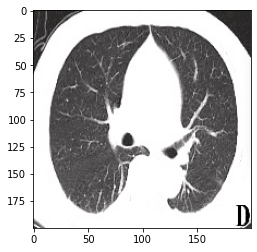

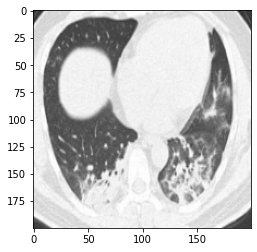

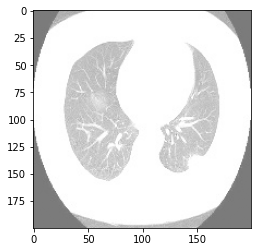

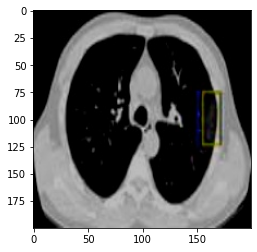

In [7]:
plot_images(false_negatives, 'false negatives')

INFO [10/10/21 14:59:15] => Plotting false positives


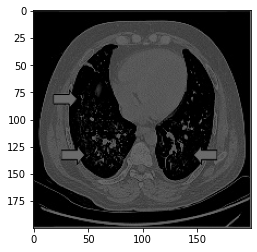

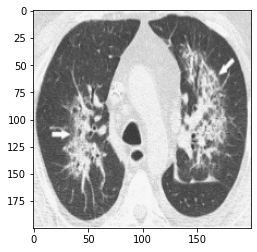

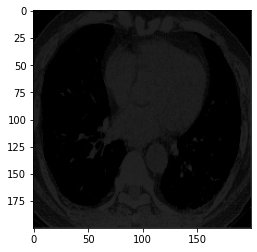

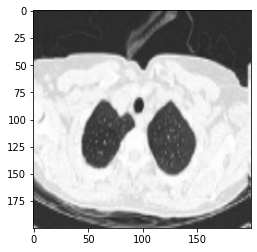

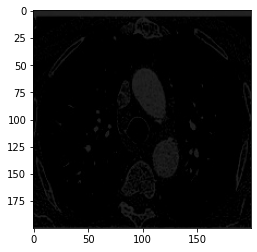

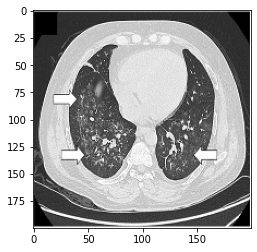

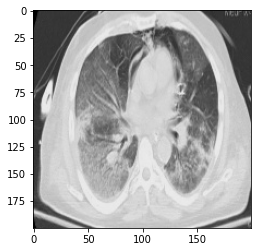

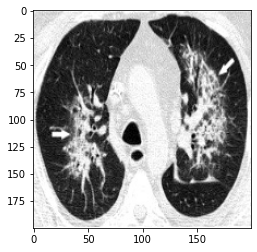

In [8]:
plot_images(false_positives, 'false positives')